In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Descriptive Statistics:
       1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  ...  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

             2016        2017        2018        2019        2020        2021  \
count  266.000000  266.000000  266.000000  266.000000  266.000000  266.000000   
mean    92.348082   92.009988   92.587491   92.189997   92.834405   93.415246   
std     14.438683   13.646626   12.148414   11.961328   11.688364 

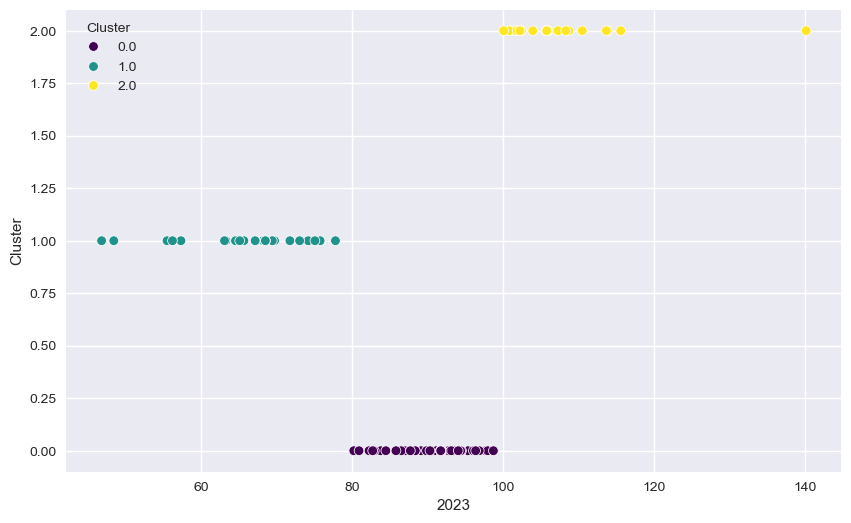

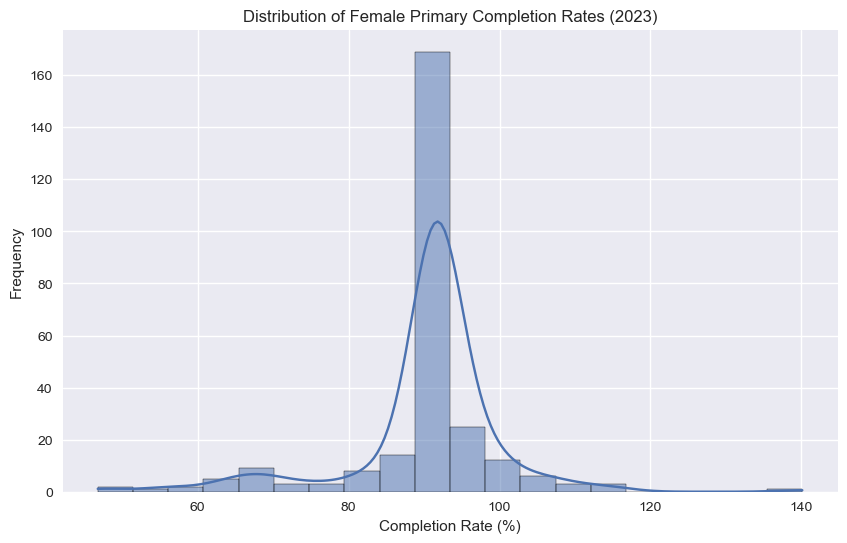

<Figure size 1200x800 with 0 Axes>

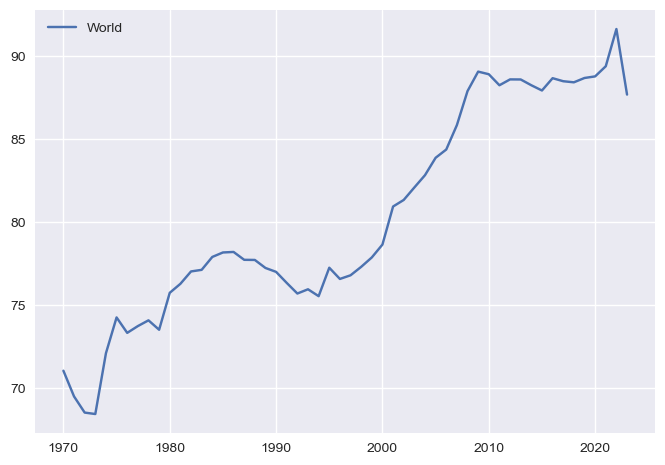

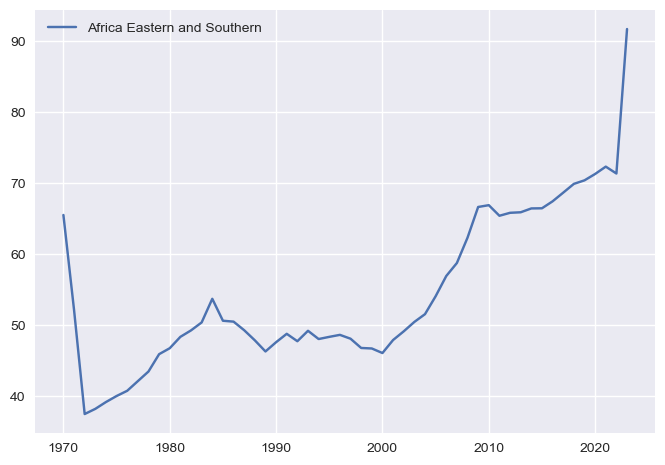

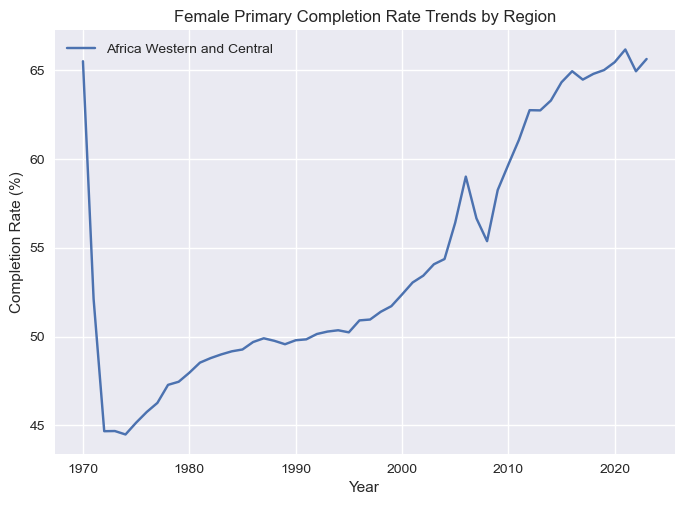

Linear Regression Metrics: {'MSE': 46.08804081469425, 'R2': 0.4228453393565923}


C:\Users\amazezerti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


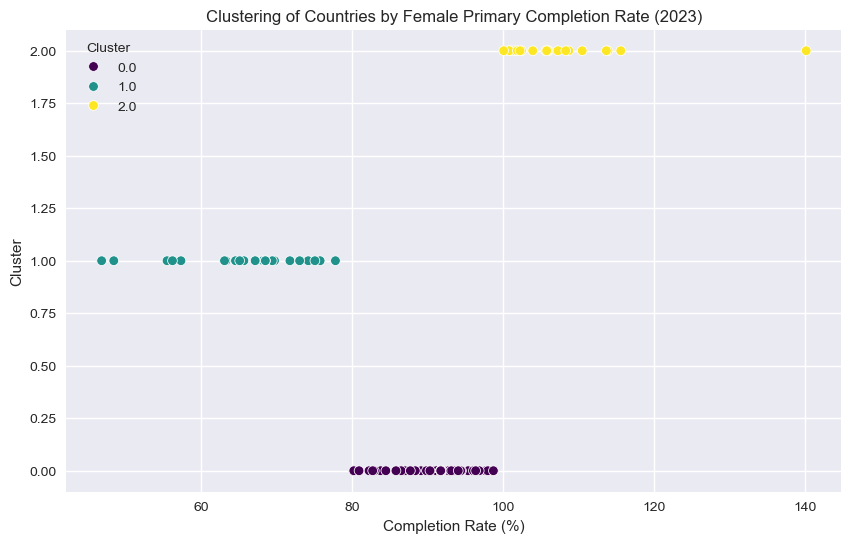

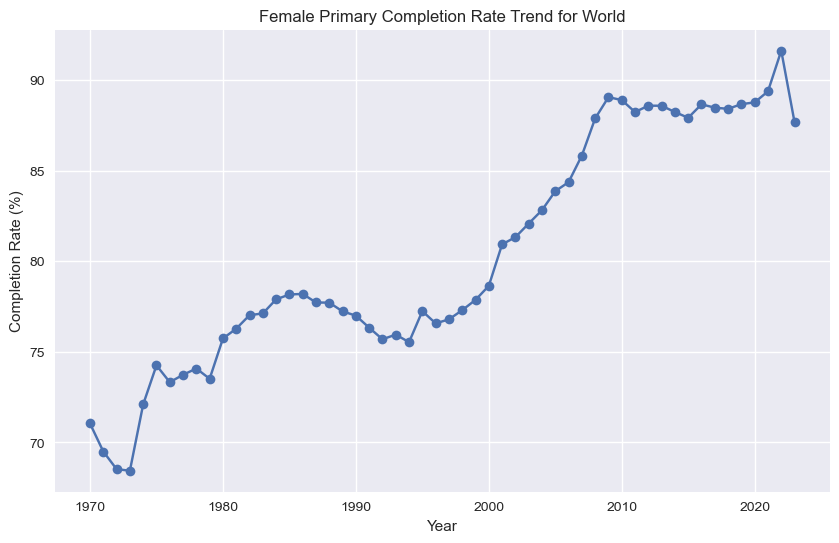

Average Yearly Growth Rate for World: 0.41%


In [4]:
# Capstone Project: Analyzing Female Primary Completion Rates
# Part 2: Python Analytics Tasks
# This notebook performs data preprocessing, exploratory data analysis (EDA), and machine learning on the female primary completion rate dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os

# Prevent KMeans memory leak warning on Windows with MKL
os.environ["OMP_NUM_THREADS"] = "2"

# Set plot style for better visuals (updated to avoid 'seaborn' error)
try:
    plt.style.use('seaborn-v0_8')  # Use seaborn-v0_8 style if available
except OSError:
    plt.style.use('ggplot')  # Fallback to ggplot if seaborn-v0_8 is unavailable
%matplotlib inline

# --- Data Loading and Preprocessing ---
def load_and_clean_data(file_path):
    """
    Load and clean the dataset by handling missing values and inconsistent formats.
    Parameters:
        file_path (str): Path to the CSV file
    Returns:
        df_clean (DataFrame): Cleaned dataset
    """
    try:
        # Load the dataset, skipping metadata rows
        df = pd.read_csv(file_path, skiprows=4)
        
        # Drop unnecessary columns
        df = df.drop(columns=['Indicator Name', 'Indicator Code'], errors='ignore')
        
        # Handle missing values: Fill with median for numeric columns
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
        
        # Drop rows with missing Country Name or Code
        df = df.dropna(subset=['Country Name', 'Country Code'])
        
        # Convert year columns to numeric, coercing errors to NaN
        for col in df.columns[2:]:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please check the file path.")
        return None
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# --- Exploratory Data Analysis ---
def perform_eda(df):
    """
    Perform exploratory data analysis with descriptive statistics and visualizations.
    Parameters:
        df (DataFrame): Cleaned dataset
    """
    if df is None:
        print("EDA cannot be performed: No data loaded.")
        return
    
    # Descriptive statistics
    print("Descriptive Statistics:")
    print(df.describe())
    
    # Plot distribution of completion rates for the latest year (2023)
    latest_year = '2023'
    plt.figure(figsize=(10, 6))
    sns.histplot(df[latest_year].dropna(), bins=20, kde=True)
    plt.title(f'Distribution of Female Primary Completion Rates ({latest_year})')
    plt.xlabel('Completion Rate (%)')
    plt.ylabel('Frequency')
    plt.savefig('C:/Users/amazezerti/CapstoneProject/visuals/dist_completion_2023.png')
    plt.show()
    
    # Plot trends for selected regions
    regions = ['World', 'Africa Eastern and Southern', 'Africa Western and Central']
    plt.figure(figsize=(12, 8))
    for region in regions:
        region_data = df[df['Country Name'] == region].iloc[:, 2:].T
        if not region_data.empty:
            region_data.columns = [region]
            region_data.plot()
        else:
            print(f"No data for region: {region}")
    plt.title('Female Primary Completion Rate Trends by Region')
    plt.xlabel('Year')
    plt.ylabel('Completion Rate (%)')
    plt.legend()
    plt.savefig('C:/Users/amazezerti/CapstoneProject/visuals/trends_regions.png')
    plt.show()

# --- Machine Learning: Linear Regression ---
def apply_linear_regression(df, target_year='2023'):
    """
    Apply linear regression to predict completion rates based on historical data.
    Parameters:
        df (DataFrame): Cleaned dataset
        target_year (str): Year to predict
    Returns:
        model_metrics (dict): Model evaluation metrics
    """
    if df is None:
        print("Linear regression cannot be performed: No data loaded.")
        return None
    
    # Prepare data: Use previous years as features
    feature_years = [str(year) for year in range(2000, int(target_year))]
    X = df[feature_years].dropna()
    y = df[target_year].loc[X.index]
    
    if X.empty or y.empty:
        print("Insufficient data for linear regression.")
        return None
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {'MSE': mse, 'R2': r2}

# --- Clustering: K-Means ---
def apply_kmeans_clustering(df, target_year='2023', n_clusters=3):
    """
    Apply K-Means clustering to group countries by completion rates.
    Parameters:
        df (DataFrame): Cleaned dataset
        target_year (str): Year to cluster
        n_clusters (int): Number of clusters
    Returns:
        df (DataFrame): Dataset with cluster labels
    """
    if df is None:
        print("Clustering cannot be performed: No data loaded.")
        return None
    
    # Prepare data
    X = df[[target_year]].dropna()
    if X.empty:
        print(f"No data available for {target_year}.")
        return df
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df.loc[X.index, 'Cluster'] = kmeans.fit_predict(X_scaled)
    
    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=target_year, y='Cluster', hue='Cluster', palette='viridis')
    plt.title(f'Clustering of Countries by Female Primary Completion Rate ({target_year})')  # Use target_year instead of latest_year
    plt.xlabel('Completion Rate (%)')
    plt.ylabel('Cluster')
    plt.savefig('C:/Users/amazezerti/CapstoneProject/visuals/clusters_2023.png')
    plt.show()
    
    return df

# --- Innovative Feature: Custom Trend Analysis ---
def custom_trend_analysis(df, country):
    """
    Analyze the trend for a specific country and calculate growth rate.
    Parameters:
        df (DataFrame): Cleaned dataset
        country (str): Country name to analyze
    Returns:
        growth_rate (float): Average yearly growth rate
    """
    if df is None:
        print("Trend analysis cannot be performed: No data loaded.")
        return None
    
    # Select data for the country, excluding non-year columns
    country_data = df[df['Country Name'] == country].iloc[:, 2:].dropna(axis=1)
    if country_data.empty:
        print(f"No data available for {country}")
        return None
    
    # Filter columns that are numeric (years), excluding 'Cluster'
    year_columns = [col for col in country_data.columns if col.isdigit()]
    country_data = country_data[year_columns]
    years = [int(col) for col in year_columns]
    rates = country_data.values.flatten()
    growth_rates = [(rates[i+1] - rates[i]) / rates[i] * 100 for i in range(len(rates)-1)]
    avg_growth_rate = np.mean(growth_rates) if growth_rates else np.nan
    
    # Plot trend
    plt.figure(figsize=(10, 6))
    plt.plot(years, rates, marker='o')
    plt.title(f'Female Primary Completion Rate Trend for {country}')
    plt.xlabel('Year')
    plt.ylabel('Completion Rate (%)')
    plt.savefig(f'C:/Users/amazezerti/CapstoneProject/visuals/trend_{country}.png')
    plt.show()
    
    return avg_growth_rate

# --- Main Execution ---
def main():
    # Load and clean data
    file_path = 'C:/Users/amazezerti/CapstoneProject/data/API_SE.PRM.CMPT.FE.ZS_DS2_en_csv_v2_20335.csv'
    df_clean = load_and_clean_data(file_path)
    if df_clean is None:
        return
    
    # Export cleaned data for Power BI
    df_clean.to_csv('C:/Users/amazezerti/CapstoneProject/data/cleaned_education_data.csv', index=False)
    
    # Perform EDA
    perform_eda(df_clean)
    
    # Apply linear regression
    metrics = apply_linear_regression(df_clean)
    if metrics:
        print("Linear Regression Metrics:", metrics)
    
    # Apply K-Means clustering
    df_clustered = apply_kmeans_clustering(df_clean)
    
    # Custom trend analysis for a specific country
    growth_rate = custom_trend_analysis(df_clustered, 'World')
    if growth_rate is not None:
        print(f"Average Yearly Growth Rate for World: {growth_rate:.2f}%")

if __name__ == '__main__':
    main()